# Import data

In [ ]:
# Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import data
link = "https://drive.google.com/file/d/12WAiv84l9JVTIPG97t_tq2Kr3h0DvZCi/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
data = pd.read_csv(path)

In [ ]:
# Show 5 dòng đầu tiên
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


In [ ]:
# Kiểm tra data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [ ]:
# Kiểm tra null
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Xóa cột không cần thiết
df = data.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


# EDA

In [ ]:
# Filter bảng thành 2 bảng exit (Yes) và cont (No)
exit = df[df['Exited']=='Yes']
cont = df[df['Exited']=='No']

In [ ]:
# Function vẽ chart 
def plot(a,b):
  plt.xlabel(a)
  plt.ylabel('Number of Customers')
  plt.title(a + ' vs Exited')
  return plt.hist([exit[a],cont[a]],color=['black','green'],label=['exit','cont'],bins = b)


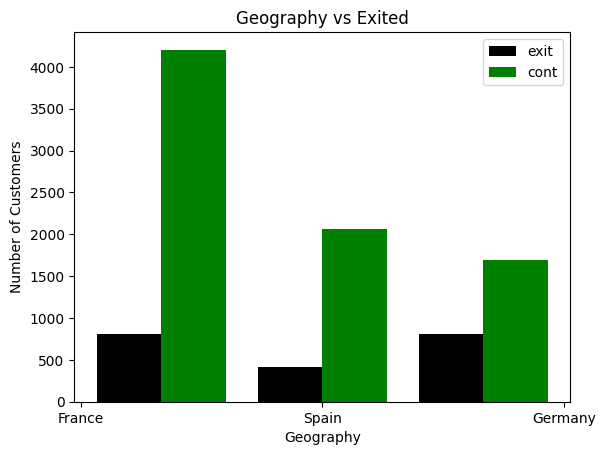

In [ ]:
plot('Geography',3)
plt.legend();

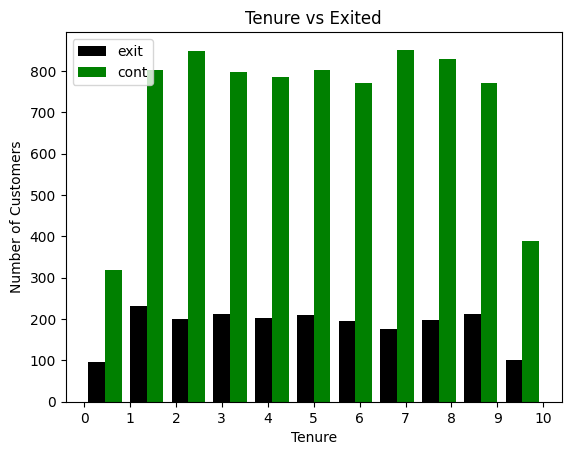

In [ ]:
plot('Tenure',11)
plt.xticks(np.arange(0,11))
plt.legend(loc='upper left');

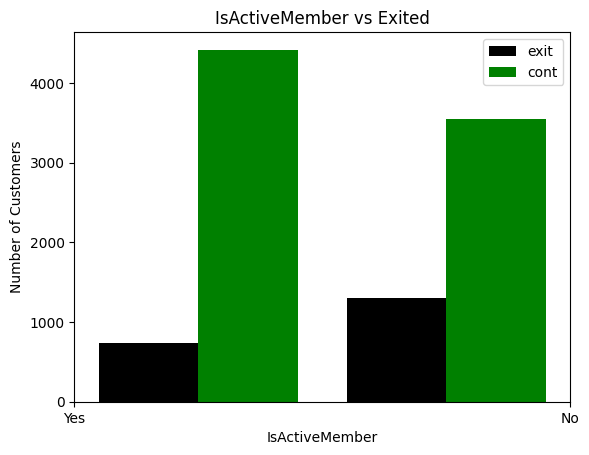

In [ ]:
plot('IsActiveMember',2)
plt.xticks(df.IsActiveMember.unique())
plt.legend();

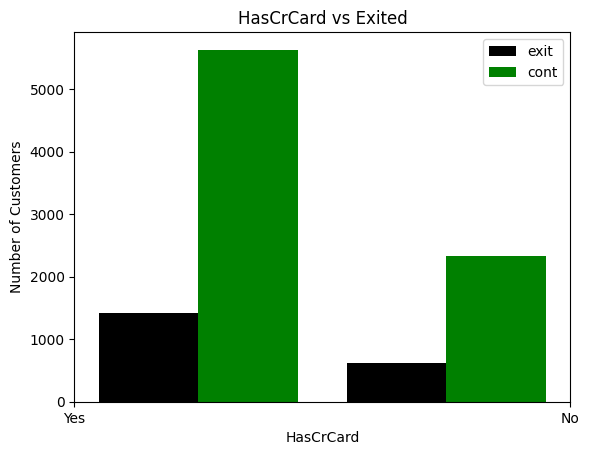

In [ ]:
plot('HasCrCard',2)
plt.xticks(df.HasCrCard.unique())
plt.legend();

In [ ]:
# Đếm dữ liệu các cột categorical
for i in df:
    if df[i].dtypes == 'object':
      print(i)
      print(df[i].value_counts())
      print("----------------------------------")

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------------------------
Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------------------------
HasCrCard
Yes    7055
No     2945
Name: HasCrCard, dtype: int64
----------------------------------
IsActiveMember
Yes    5151
No     4849
Name: IsActiveMember, dtype: int64
----------------------------------
Exited
No     7963
Yes    2037
Name: Exited, dtype: int64
----------------------------------


# Data processing

In [ ]:
# Change binary values to 0,1
col_yes_no = ['HasCrCard','IsActiveMember','Exited']
for i in col_yes_no:
  df[i].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)

In [ ]:
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(data=df, columns=['Geography'])

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
# Scale to range (0,1)
col_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_scale] = scaler.fit_transform(df[col_scale])

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


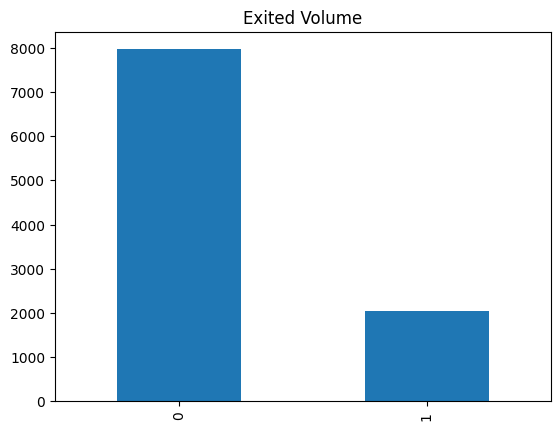

In [ ]:
# Information of y columns (imbalance)
df['Exited'].value_counts().plot(kind='bar')
plt.title('Exited Volume')
plt.show()

# Running model with original data

In [ ]:
y = df['Exited']
X = df.drop(['Exited'], axis =1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8000, 12)
X_test shape: (2000, 12)
y_train shape: (8000,)
y_test shape: (2000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
import datetime

In [ ]:
models = [
    LogisticRegression(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    BaggingClassifier(LogisticRegression()),
    AdaBoostClassifier(LogisticRegression()),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()]
times = []
scores = []
name=[]
for model in models:
  t1 = datetime.datetime.now()
  model_name = model.__class__.__name__
  model.fit(X_train,y_train)
  t2 = datetime.datetime.now()    
  d = round((t2 - t1).microseconds/1000,1)
  y_pred = model.predict(X_test)        
  scores.append(round(metrics.accuracy_score(y_test, y_pred)*100,2))
  times.append(d)
  name.append(model_name) 

In [ ]:
model_info = pd.DataFrame(np.column_stack([name, scores, times]),columns=['Name', 'Score(%)','Time (s)'])
model_info

,Name,Score(%),Time (s)
0,LogisticRegression,81.25,94.5
1,GaussianNB,82.8,5.9
2,SVC,84.45,64.8
3,RandomForestClassifier,86.95,865.4
4,DecisionTreeClassifier,77.95,36.7
5,BaggingClassifier,81.45,379.5
6,AdaBoostClassifier,81.4,607.8
7,GradientBoostingClassifier,86.4,29.2
8,XGBClassifier,86.1,716.8


In [ ]:
# Random Forest model
from sklearn.metrics import classification_report
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_pred_rfc = rfc_model.predict(X_test) 
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
# XGBoost model
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train,y_train)
y_pred_xg = xg_model.predict(X_test) 
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# Running model with upsampling data

In [ ]:
from imblearn.over_sampling import SMOTE
SM_Model=SMOTE()
X_SM, y_SM = SM_Model.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_SM_train, X_SM_test, y_SM_train, y_SM_test = train_test_split(X_SM, y_SM, test_size=0.2, random_state=42)

In [ ]:
print('X_SM_train shape:',X_SM_train.shape)
print('X_SM_test shape:',X_SM_test.shape)
print('y_SM_train shape:',y_SM_train.shape)
print('y_SM_test shape:',y_SM_test.shape)

X_SM_train shape: (12740, 12)
X_SM_test shape: (3186, 12)
y_SM_train shape: (12740,)
y_SM_test shape: (3186,)


In [ ]:
models = [
    LogisticRegression(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    BaggingClassifier(LogisticRegression()),
    AdaBoostClassifier(LogisticRegression()),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()]
times = []
scores = []
name=[]
for model in models:
  t1 = datetime.datetime.now()
  model_name = model.__class__.__name__
  model.fit(X_SM_train,y_SM_train)
  t2 = datetime.datetime.now()    
  d = round((t2 - t1).microseconds/1000,1)
  y_SM_pred = model.predict(X_SM_test)        
  scores.append(round(metrics.accuracy_score(y_SM_test, y_SM_pred)*100,2))
  times.append(d)
  name.append(model_name) 

In [ ]:
model_UP_info = pd.DataFrame(np.column_stack([name, scores, times]),columns=['Name', 'Score(%)','Time (s)'])
model_UP_info

,Name,Score(%),Time (s)
0,LogisticRegression,71.44,69.2
1,GaussianNB,71.34,8.4
2,SVC,78.28,172.8
3,RandomForestClassifier,90.08,548.2
4,DecisionTreeClassifier,82.74,68.0
5,BaggingClassifier,71.44,90.7
6,AdaBoostClassifier,66.67,574.5
7,GradientBoostingClassifier,87.1,3.9
8,XGBClassifier,90.96,256.9


## XGBoost

In [ ]:
# XGBoost with default hyperparameter
xg_up_model = xgb.XGBClassifier()
xg_up_model.fit(X_SM_train,y_SM_train)
y_SM_pred_xg = xg_up_model.predict(X_SM_test)
print(classification_report(y_SM_test, y_SM_pred_xg))
print("XGBoost score:",metrics.accuracy_score(y_SM_test,y_SM_pred_xg))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1633
           1       0.93      0.88      0.91      1553

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186

XGBoost score: 0.9096045197740112


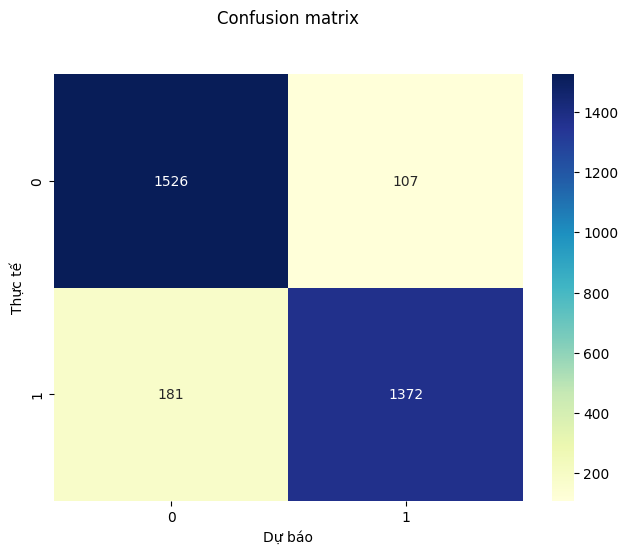

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_SM_test,y_SM_pred_xg)), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo');

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
xgb_model = xgb.XGBClassifier()

# define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5, 1],
    'max_depth': [5, 11, 17],
    'n_estimators': [100, 200, 500]
}

# initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# fit GridSearchCV on training data
grid_search.fit(X_SM_train, y_SM_train)

# print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# evaluate model on test data using best parameters
y_SM_pred = grid_search.predict(X_SM_test)
print(classification_report(y_SM_test, y_SM_pred))

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best accuracy score:  0.9040816326530612
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1633
           1       0.93      0.89      0.91      1553

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



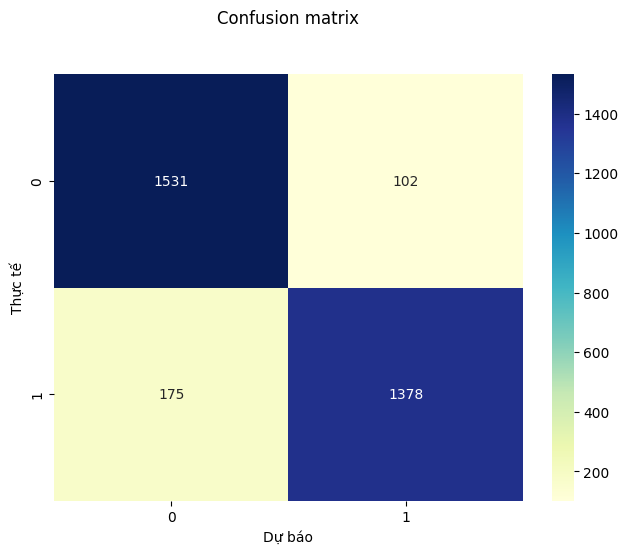

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_SM_test,y_SM_pred)), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo');

## RandomForest

In [ ]:
# Random Forest with default hyperparameter
rfc_up_model = RandomForestClassifier()
rfc_up_model.fit(X_SM_train,y_SM_train)
y_SM_pred_rfc = rfc_up_model.predict(X_SM_test)
print(classification_report(y_SM_test, y_SM_pred_rfc))
print(metrics.accuracy_score(y_SM_test,y_SM_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1633
           1       0.89      0.91      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186

0.901443816698054


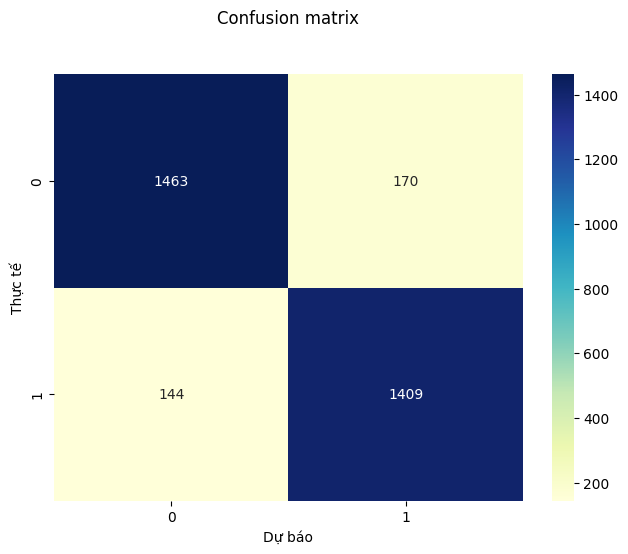

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_SM_test,y_SM_pred_rfc)), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo');

In [ ]:
rf_model = RandomForestClassifier()

# define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini','entropy']
}

# initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# fit GridSearchCV on training data
grid_search.fit(X_SM_train, y_SM_train)

# print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# evaluate model on test data using best parameters
y_SM_pred = grid_search.predict(X_SM_test)
print(classification_report(y_SM_test, y_SM_pred))

Best parameters found:  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score:  0.8914442700156986
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1633
           1       0.89      0.91      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



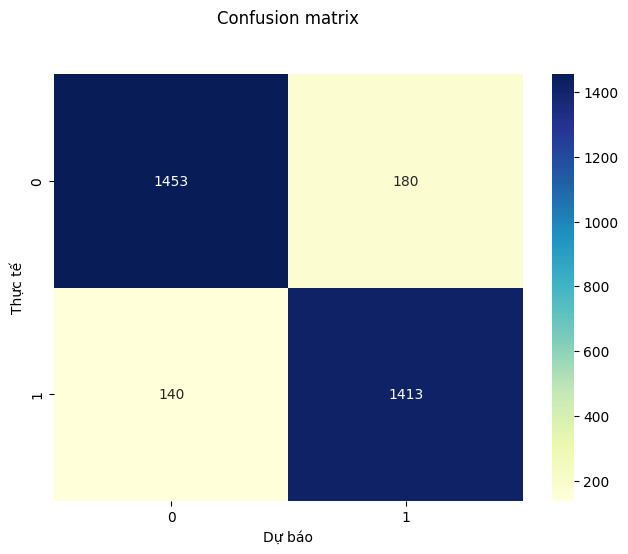

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_SM_test,y_SM_pred)), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo');

## Neural Network model

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(12,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_SM_train, y_SM_train, epochs=194, batch_size=32)

Epoch 1/194
399/399 [==============================] - 3s 4ms/step - loss: 0.5762 - accuracy: 0.6959
Epoch 2/194
399/399 [==============================] - 2s 4ms/step - loss: 0.4704 - accuracy: 0.7718
Epoch 3/194
399/399 [==============================] - 2s 6ms/step - loss: 0.4440 - accuracy: 0.7881
Epoch 4/194
399/399 [==============================] - 2s 4ms/step - loss: 0.4343 - accuracy: 0.7943
Epoch 5/194
399/399 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.7975
Epoch 6/194
399/399 [==============================] - 1s 4ms/step - loss: 0.4225 - accuracy: 0.8002
Epoch 7/194
399/399 [==============================] - 2s 4ms/step - loss: 0.4163 - accuracy: 0.8035
Epoch 8/194
399/399 [==============================] - 2s 4ms/step - loss: 0.4099 - accuracy: 0.8109
Epoch 9/194
399/399 [==============================] - 2s 4ms/step - loss: 0.4046 - accuracy: 0.8132
Epoch 10/194
399/399 [==============================] - 2s 5ms/step - loss: 0.4035 - accura

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 200)               2600      
                                                                 
 dense_11 (Dense)            (None, 100)               20100     
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 29,051
Trainable params: 29,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_SM_pred_keras = model.predict(X_SM_test)

100/100 [==============================] - 0s 1ms/step


In [ ]:
y_SM_pred_keras_yn = []
for element in y_SM_pred_keras:
    if element > 0.5:
        y_SM_pred_keras_yn.append(1)
    else:
        y_SM_pred_keras_yn.append(0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_SM_test,y_SM_pred_keras_yn))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1633
           1       0.89      0.90      0.89      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



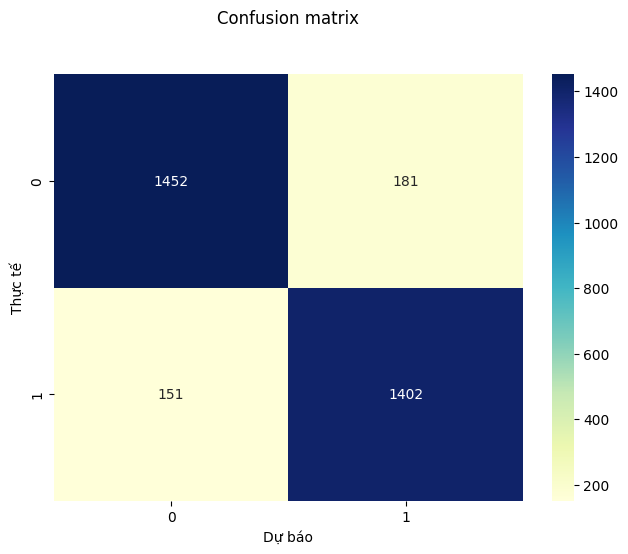

In [ ]:
from sklearn import metrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_SM_test,y_SM_pred_keras_yn)), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo');